In [1]:
%matplotlib inline
from matplotlib import rc
from matplotlib import pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

rc('font', family='Malgun Gothic')  # Windows 일 경우
# rc('font', family='AppleGothic')  # Mac 일 경우

import numpy as np
import pandas as pd

In [2]:
import pandas as pd

url = "https://finance.naver.com/marketindex/exchangeList.nhn"

df = pd.read_html(url)[0]
df.columns = [
    '통화명', '매매기준율', '현찰 - 사실 때', '현찰 - 파실 때',
    '송금 - 보내실 때', '송금 - 받으실 때', '미화환산율',
]
df = df.set_index('통화명')

print(df.shape)
df.head()

(44, 6)


,매매기준율,현찰 - 사실 때,현찰 - 파실 때,송금 - 보내실 때,송금 - 받으실 때,미화환산율
통화명,,,,,,
미국 USD,1132.50,1152.31,1112.69,1143.50,1121.50,1.000
유럽연합 EUR,1281.48,1306.98,1255.98,1294.29,1268.67,1.132
일본 JPY (100엔),996.83,1014.27,979.39,1006.59,987.07,0.880
중국 CNY,163.10,171.25,154.95,164.73,161.47,0.144
홍콩 HKD,144.62,147.46,141.78,146.06,143.18,0.128


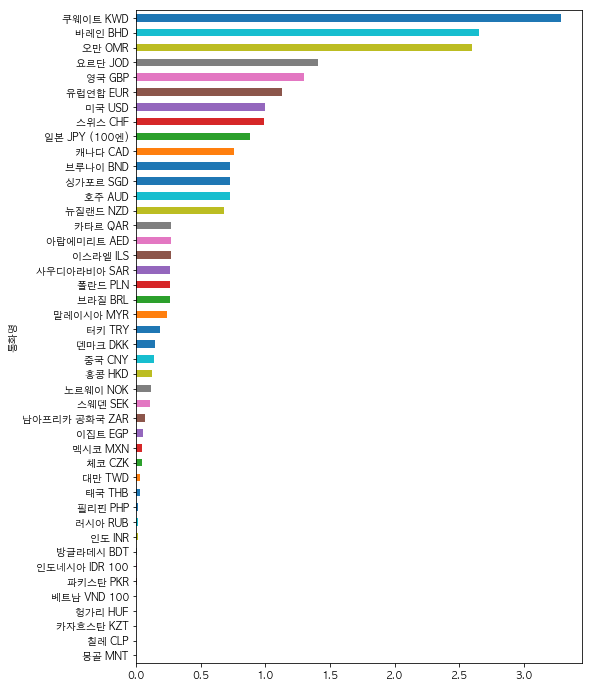

In [12]:
ax = df['미화환산율'].sort_values().plot(kind='barh', figsize=(8, 12))  # line, bar, barh, pie
ax

In [ ]:
# 시스템에 등록된 TTF 폰트 목록
from matplotlib import font_manager

font_manager.fontManager.ttflist

## EP06

In [14]:
df1 = pd.DataFrame([
    [1, 2, 3],
    [4, 5, 6],
])
df1

,0,1,2
0,1,2,3
1,4,5,6


In [16]:
df2 = pd.DataFrame([
    [4, 5, 6],
])
df2

,0,1,2
0,4,5,6


In [17]:
df1 + df2

,0,1,2
0,5.0,7.0,9.0
1,NaN,NaN,NaN


In [18]:
np.nan

nan

## pd.concat

In [21]:
df_2016_01 = pd.read_excel('data/2016-01.xls')
print(df_2016_01.shape)
df_2016_01.head()

(200, 3)


,상품명,판매건수,가격
0,봉투,12362,50
1,바나나,4285,3900
2,야채,4190,0
3,켐벨포도,2780,29800
4,알뜰특란,2768,5300


In [22]:
df_2016_01 = pd.read_excel('data/2016-01.xls')#, index_col='상품명')
df_2016_02 = pd.read_excel('data/2016-02.xls')
df_2016_03 = pd.read_excel('data/2016-03.xls')

In [29]:
df_list = [df_2016_01, df_2016_02, df_2016_03]

df_2016_1q = pd.concat(df_list, axis="index")
print(df_2016_1q.shape)
df_2016_1q.head()

(600, 3)


,상품명,판매건수,가격
0,봉투,12362,50
1,바나나,4285,3900
2,야채,4190,0
3,켐벨포도,2780,29800
4,알뜰특란,2768,5300


In [31]:
# 개선
df_2016_01['년월'] = '2016-01'
df_2016_02['년월'] = '2016-02'
df_2016_03['년월'] = '2016-03'

df_list = [df_2016_01, df_2016_02, df_2016_03]

df_2016_1q = pd.concat(df_list, axis="index")
df_2016_1q = df_2016_1q.set_index('상품명')   # addded
print(df_2016_1q.shape)
df_2016_1q.head()

(600, 3)


,판매건수,가격,년월
상품명,,,
봉투,12362,50,2016-01
바나나,4285,3900,2016-01
야채,4190,0,2016-01
켐벨포도,2780,29800,2016-01
알뜰특란,2768,5300,2016-01


In [36]:
df_2016_1q.loc['봉투']

,판매건수,가격,년월
상품명,,,
봉투,12362,50,2016-01
봉투,2038,30,2016-01
봉투,10519,50,2016-02
봉투,1823,30,2016-02
봉투,11902,50,2016-03
봉투,2072,30,2016-03


In [39]:
df_2016_1q['매출'] = df_2016_1q['판매건수'] * df_2016_1q['가격']
df_2016_1q.head()

,판매건수,가격,년월,매출
상품명,,,,
봉투,12362,50,2016-01,618100
바나나,4285,3900,2016-01,16711500
야채,4190,0,2016-01,0
켐벨포도,2780,29800,2016-01,82844000
알뜰특란,2768,5300,2016-01,14670400


In [40]:
df_2016_1q['매출'].sum()

1217924740

In [56]:
import os
import glob   # python 3.4부터는 pathlib이 지원
import datetime

# now = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# print(now)

# # date-util
# yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
# print(yesterday)

df_list = []

for xls_path in glob.glob('data/2016-*.xls*'):
    print(xls_path)
    
    filename = os.path.basename(xls_path)
    yearmonth, ext = os.path.splitext(filename)

    df = pd.read_excel(xls_path, index_col='상품명')
    df['년월'] = yearmonth
    
    df_list.append(df)
    
len(df_list)

data/2016-04.xls
data/2016-05.xls
data/2016-06.xls
data/2016-02.xls
data/2016-03.xls
data/2016-01.xls


6

In [57]:
df_2016_1q = pd.concat(df_list)
print(df_2016_1q.shape)
df_2016_1q.head()

(1200, 3)


,판매건수,가격,년월
상품명,,,
봉투,12414,50,2016-04
알뜰특란,5217,5300,2016-04
백오이,4236,1490,2016-04
바나나,3726,3900,2016-04
야채,3372,0,2016-04


In [59]:
df_2016_1q['매출'] = df_2016_1q['판매건수'] * df_2016_1q['가격']

df_2016_1q.to_excel("data/2016-1q.xlsx")

In [54]:
import os

path = "data/2016-04.xls"
filename = os.path.basename(path)   # <-> os.path.dirname
print(filename)
yearmonth, ext = os.path.splitext(filename)
yearmonth

2016-04.xls


'2016-04'

In [64]:
# df_2016_1q = df_2016_1q.drop('매출', axis="columns")
# df_2016_1q.drop('매출', axis="columns", inplace=True)
df_2016_1q.drop(columns="매출", inplace=True)
df_2016_1q.head()

,판매건수,가격,년월
상품명,,,
봉투,12414,50,2016-04
알뜰특란,5217,5300,2016-04
백오이,4236,1490,2016-04
바나나,3726,3900,2016-04
야채,3372,0,2016-04


In [66]:
# df_2016_1q.drop("봉투", axis="index", inplace=True)
df_2016_1q.drop(index="봉투", inplace=True)
df_2016_1q.head()

,판매건수,가격,년월
상품명,,,
알뜰특란,5217,5300,2016-04
백오이,4236,1490,2016-04
바나나,3726,3900,2016-04
야채,3372,0,2016-04
애호박,3011,1490,2016-04


In [68]:
file_path = 'c:/work/a/b/c/df_2016_1q.xlsx'

dir_path = os.path.dirname(file_path)
if not os.path.exists(dir_path):
    os.makedirs(dir_path)  # 재귀적으로 동작

df_2016_1q.to_excel(file_path)

# df_2016_1q.to_excel('c:\\work\\b\\c\\df_2016_1q.xlsx')
# df_2016_1q.to_excel(r'c:\work\b\c\df_2016_1q.xlsx')  # r => raw

In [ ]:
# os.walk('.')

## EP07

In [70]:
df_2016_1q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1188 entries, 알뜰특란 to 한돈앞다리/불고기,찌개(국내산)
Data columns (total 3 columns):
판매건수    1188 non-null int64
가격      1188 non-null int64
년월      1188 non-null object
dtypes: int64(2), object(1)
memory usage: 37.1+ KB


In [71]:
melon_df = pd.read_csv("https://goo.gl/iDUKrL", index_col="곡일련번호")
print(melon_df.shape)
melon_df.head()

(100, 6)


,순위,앨범,곡명,가수,커버이미지_주소,좋아요
곡일련번호,,,,,,
31346009,1,삐삐,삐삐,아이유,https://cdnimg.melon.co.kr/cm/album/images/102...,61528
31344113,2,시간이 들겠지,시간이 들겠지 (Feat. Colde),로꼬,https://cdnimg.melon.co.kr/cm/album/images/102...,48331
31340985,3,쇼미더머니 777 Episode 1,Good Day (Feat. 팔로알토) (Prod. 코드 쿤스트),pH-1,https://cdnimg.melon.co.kr/cm/album/images/102...,54022
31316695,4,하루도 그대를 사랑하지 않은 적이 없었다,하루도 그대를 사랑하지 않은 적이 없었다,임창정,https://cdnimg.melon.co.kr/cm/album/images/102...,97984
31266290,5,LOVE YOURSELF 結 `Answer`,IDOL,방탄소년단,https://cdnimg.melon.co.kr/cm/album/images/101...,173279


In [82]:
def fn(value):
    return len(value.split())

melon_df['곡명_단어수'] = melon_df['곡명'].apply(fn)
melon_df[['곡명', '곡명_단어수']].head()

,곡명,곡명_단어수
곡일련번호,,
31346009,삐삐,1
31344113,시간이 들겠지 (Feat. Colde),4
31340985,Good Day (Feat. 팔로알토) (Prod. 코드 쿤스트),7
31316695,하루도 그대를 사랑하지 않은 적이 없었다,6
31266290,IDOL,1


## EP08: 빠진 데이터 처리하기

In [83]:
train_df = pd.read_csv('data/titanic/train.csv')
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


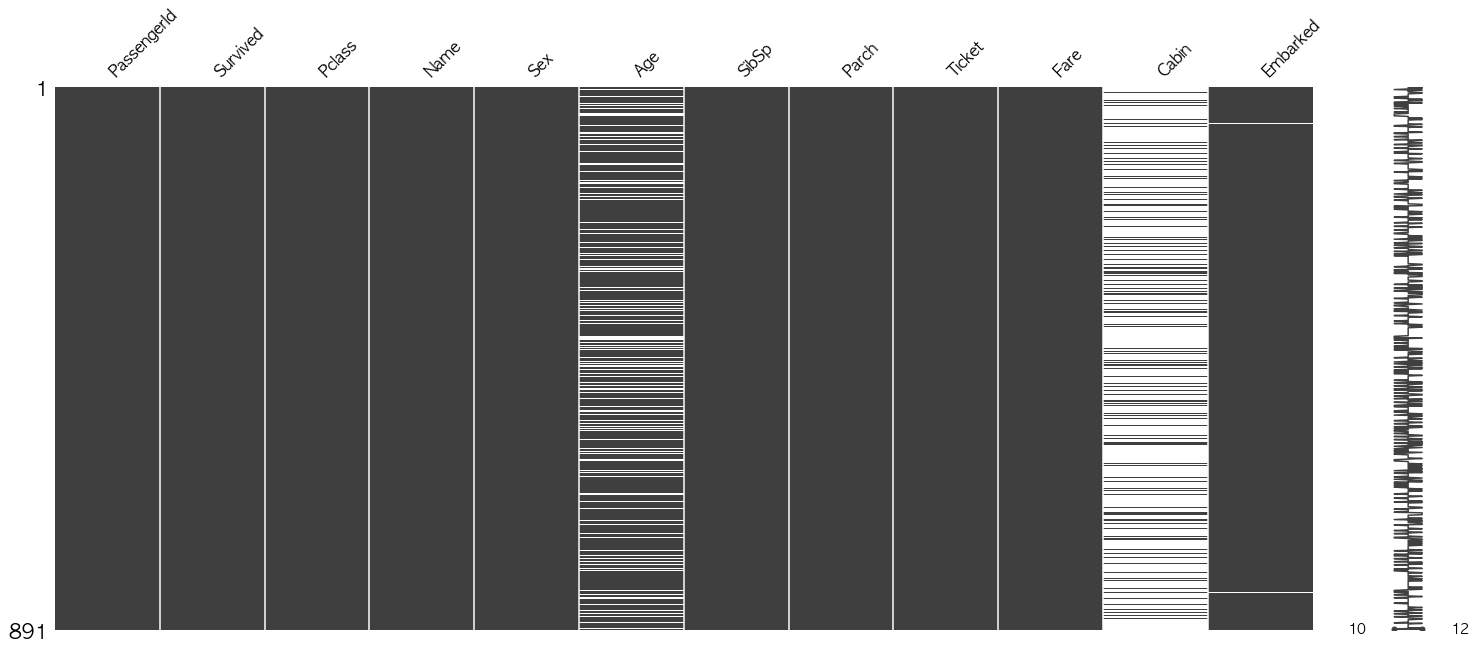

In [84]:
import missingno as msno

msno.matrix(train_df)

In [94]:
# train_df.fillna(0)
# train_df['Age'].fillna(0)

# mask = train_df['Pclass'] == 1
# train_df.loc[mask, 'Age'].fillna(0)

## EP09: 피벗 테이블

In [96]:
df_2016_1q.describe()

,판매건수,가격
count,1188.000000,1188.000000
mean,681.925926,3100.664983
std,587.960075,4909.179577
min,214.000000,0.000000
25%,334.750000,640.000000
50%,491.000000,1980.000000
75%,777.500000,3980.000000
max,5217.000000,49800.000000


In [116]:
percentiles = np.arange(0.1, 1, 0.1)  # ndarray
percentiles

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [117]:
df_2016_1q.describe(percentiles=percentiles)

,판매건수,가격
count,1188.000000,1188.000000
mean,681.925926,3100.664983
std,587.960075,4909.179577
min,214.000000,0.000000
10%,280.000000,0.000000
20%,317.400000,0.000000
30.0%,358.100000,990.000000
40%,417.800000,1490.000000
50%,491.000000,1980.000000
60%,580.000000,2850.000000


In [101]:
df_2016_1q.mean()

판매건수     681.925926
가격      3100.664983
dtype: float64

In [102]:
df_2016_1q.median()  # 중위값

판매건수     491.0
가격      1980.0
dtype: float64

In [119]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

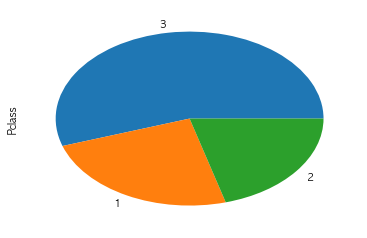

In [122]:
train_df['Pclass'].value_counts().plot(kind='pie')

In [123]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
train_df.pivot_table(index='Sex', aggfunc='sum')

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,7286.00,13966.6628,204,135343,678,218,233
male,13919.17,14727.2865,136,262043,1379,248,109


In [130]:
train_df.pivot_table(index='Sex', values=['Survived', 'Fare'], aggfunc='sum')

,Fare,Survived
Sex,,
female,13966.6628,233
male,14727.2865,109


In [132]:
train_df.pivot_table(
    index='Sex',
    columns=['Pclass'],
    values=['Survived', 'Fare'],
    aggfunc='sum')

Fare                       Survived        
Pclass          1          2          3        1   2   3
Sex                                                     
female  9975.8250  1669.7292  2321.1086       91  70  72
male    8201.5875  2132.1125  4393.5865       45  17  47

## 네이버 쇼핑 크롤링

In [137]:
"LG 트롬".encode("utf8")

b'LG \xed\x8a\xb8\xeb\xa1\xac'

In [165]:
url = "https://search.shopping.naver.com/search/all.nhn"
params = {
    "origQuery": "LG 트롬",
    "query": "LG 트롬",
    "brand": "116504",
    "spec": "M1574|M8609",
    "pagingIndex": 1,
    "pagingSize": 40,
    "viewType": "list",
    "sort": "rel",
    "frm": "NVSHPRC",
    "minPrice": 1760000,
    "maxPrice": 40000000,    
}

In [166]:
import requests  # pip install requests
from bs4 import BeautifulSoup

res = requests.get(url, params=params)
res

<Response [200]>

In [167]:
html = res.text
soup = BeautifulSoup(html, 'html.parser')  # HTML/XML Parser, for 크롤링

In [202]:
# TODO: selecttor 지정


for tag in soup.select('.goods_list .info a.tit'):
    tag  # Tag
    tag['href']
    print(tag.text.strip())

제니스 LG전자 트롬 RN1044A
제니스 LG전자 트롬 RN1044A
제니스 LG전자 트롬 RN1044A
트롬 홀세일 LG전자 트롬 RN1044A
MRO1 LG전자 트롬 RN1044A
MRO1 LG전자 트롬 RN1044A
MRO1 LG전자 트롬 RN1044A
트롬 MRO1 LG전자 트롬 RN1044A
LG전자 제니스 LG전자 트롬 RN1044A
제니스 LG전자 트롬 RN1044A
트롬 홀세일 LG전자 트롬 RN1044A


In [198]:
tag_list = soup.select('ul.goods_list li div.info a.tit')  # CSS selector
for prod in tag_list:
    print(prod['title'])

제니스 LG전자 트롬 RN1044A
제니스 LG전자 트롬 RN1044A
제니스 LG전자 트롬 RN1044A
트롬 홀세일 LG전자 트롬 RN1044A
MRO1 LG전자 트롬 RN1044A
MRO1 LG전자 트롬 RN1044A
MRO1 LG전자 트롬 RN1044A
트롬 MRO1 LG전자 트롬 RN1044A
LG전자 제니스 LG전자 트롬 RN1044A
제니스 LG전자 트롬 RN1044A
트롬 홀세일 LG전자 트롬 RN1044A


## 대기오염정보

In [147]:
인증키 = "19Vd8w1VF6MhraamtQDCGukzgHbTbDksZvFa3yYHrfdvdsmlCZ9TnKwG9DkHkLabLTxYBw3vgymDd4MR7bg9%2Bg%3D%3D"

In [149]:
from urllib.parse import unquote

인증키 = unquote(인증키)
인증키

'19Vd8w1VF6MhraamtQDCGukzgHbTbDksZvFa3yYHrfdvdsmlCZ9TnKwG9DkHkLabLTxYBw3vgymDd4MR7bg9+g=='

In [155]:
api_endpoint = 'https://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMinuDustFrcstDspth'

# today = datetime.datetime.now().strftime('%Y-%m-%d')
today = '2018-11-15'

params = {
    'searchDate': today,
    'ServiceKey': 인증키,
    '_returnType': 'json',
}

In [156]:
import requests

res = requests.get(api_endpoint, params=params)
res.text

ConnectionError: HTTPSConnectionPool(host='openapi.airkorea.or.kr', port=443): Max retries exceeded with url: /openapi/services/rest/ArpltnInforInqireSvc/getMinuDustFrcstDspth?searchDate=2018-11-15&ServiceKey=19Vd8w1VF6MhraamtQDCGukzgHbTbDksZvFa3yYHrfdvdsmlCZ9TnKwG9DkHkLabLTxYBw3vgymDd4MR7bg9%2Bg%3D%3D&_returnType=json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1a20ede278>: Failed to establish a new connection: [Errno 60] Operation timed out',))

In [172]:
응답_문자열 = '{"MinuDustFrcstDspthVo":{"_returnType":"json","actionKnack":"","dataTime":"","f_data_time":"","f_data_time1":"","f_data_time2":"","f_data_time3":"","f_inform_data":"","imageUrl1":"","imageUrl2":"","imageUrl3":"","imageUrl4":"","imageUrl5":"","imageUrl6":"","imageUrl7":"","imageUrl8":"","imageUrl9":"","informCause":"","informCode":"","informData":"","informGrade":"","informOverall":"","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"2018-11-14","serviceKey":"19Vd8w1VF6MhraamtQDCGukzgHbTbDksZvFa3yYHrfdvdsmlCZ9TnKwG9DkHkLabLTxYBw3vgymDd4MR7bg9+g==","totalCount":"","ver":""},"list":[{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 23시 발표","f_data_time":"2018111423","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181114","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99557","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99558","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99559","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99560","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99561","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99562","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99553","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 서쪽 지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-14","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 좋음,경북 : 좋음,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 23시 발표","f_data_time":"2018111423","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181115","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99557","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99558","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99559","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99560","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99561","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99562","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99553","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 서쪽지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-15","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 보통,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 수도권·충남·광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 23시 발표","f_data_time":"2018111423","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181116","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99563","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99564","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99565","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99566","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99567","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99568","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99553","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 지역은 대기 정체로 축적된 국내 생성 미세먼지에 국외에서 유입되는 미세먼지가 더해져 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-16","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 보통,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 보통,영서 : 보통,경기남부 : 나쁨,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 수도권·강원권·충청권·광주·전북·대구·경북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 23시 발표","f_data_time":"2018111423","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181114","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99557","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99558","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99559","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99560","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99561","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99562","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99554","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 서쪽 지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-14","informGrade":"서울 : 보통,제주 : 보통,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 좋음,경북 : 보통,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 23시 발표","f_data_time":"2018111423","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181115","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99557","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99558","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99559","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99560","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99561","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99562","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99554","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 서쪽지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-15","informGrade":"서울 : 나쁨,제주 : 좋음,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 보통,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 나쁨,경기북부 : 나쁨,인천 : 나쁨","informOverall":"○ [미세먼지] 수도권·충남·광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 23시 발표","f_data_time":"2018111423","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181116","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99563","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99564","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99565","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99566","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99567","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99568","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99554","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 지역은 대기 정체로 축적된 국내 생성 미세먼지에 국외에서 유입되는 미세먼지가 더해져 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-16","informGrade":"서울 : 나쁨,제주 : 좋음,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 보통,경북 : 나쁨,울산 : 보통,대구 : 나쁨,부산 : 보통,충남 : 나쁨,충북 : 나쁨,세종 : 나쁨,대전 : 나쁨,영동 : 나쁨,영서 : 나쁨,경기남부 : 나쁨,경기북부 : 나쁨,인천 : 나쁨","informOverall":"○ [미세먼지] 수도권·강원권·충청권·광주·전북·대구·경북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 17시 발표","f_data_time":"2018111417","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181114","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99541","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99542","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99543","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99544","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99545","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99546","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99553","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 남서부지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-14","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 좋음,경북 : 좋음,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 17시 발표","f_data_time":"2018111417","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181115","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99541","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99542","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99543","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99544","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99545","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99546","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99553","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 대부분 서쪽지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-15","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 보통,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 수도권·충남·광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 17시 발표","f_data_time":"2018111417","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181116","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99547","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99548","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99549","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99550","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99551","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99552","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99553","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 지역은 대기 정체로 축적된 국내 생성 미세먼지에 국외에서 유입되는 미세먼지가 더해져 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-16","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 보통,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 보통,영서 : 보통,경기남부 : 나쁨,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 수도권·강원권·충청권·광주·전북·대구·경북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 17시 발표","f_data_time":"2018111417","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181114","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99541","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99542","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99543","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99544","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99545","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99546","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99554","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 남서부지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-14","informGrade":"서울 : 보통,제주 : 보통,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 좋음,경북 : 보통,울산 : 좋음,대구 : 보통,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 17시 발표","f_data_time":"2018111417","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181115","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99541","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99542","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99543","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99544","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99545","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99546","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99554","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 대부분 서쪽지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-15","informGrade":"서울 : 나쁨,제주 : 좋음,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 보통,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 나쁨,경기북부 : 나쁨,인천 : 나쁨","informOverall":"○ [미세먼지] 수도권·충남·광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 17시 발표","f_data_time":"2018111417","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181116","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99547","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99548","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99549","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99550","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99551","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99552","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99554","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 지역은 대기 정체로 축적된 국내 생성 미세먼지에 국외에서 유입되는 미세먼지가 더해져 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-16","informGrade":"서울 : 나쁨,제주 : 좋음,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 보통,경북 : 나쁨,울산 : 보통,대구 : 나쁨,부산 : 보통,충남 : 나쁨,충북 : 나쁨,세종 : 나쁨,대전 : 나쁨,영동 : 나쁨,영서 : 나쁨,경기남부 : 나쁨,경기북부 : 나쁨,인천 : 나쁨","informOverall":"○ [미세먼지] 수도권·강원권·충청권·광주·전북·대구·경북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 11시 발표","f_data_time":"2018111411","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181114","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99525","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99526","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99527","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99528","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99529","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99530","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99489","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 서쪽지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-14","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 좋음,경북 : 좋음,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 충남·광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 11시 발표","f_data_time":"2018111411","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181115","imageUrl1":"","imageUrl2":"","imageUrl3":"","imageUrl4":"","imageUrl5":"","imageUrl6":"","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99489","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 중서부지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-15","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 서울·인천·경기남부·충남은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 11시 발표","f_data_time":"2018111411","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181114","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99525","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99526","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99527","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99528","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99529","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99530","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99490","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 서쪽지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-14","informGrade":"서울 : 보통,제주 : 보통,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 좋음,경북 : 보통,울산 : 좋음,대구 : 보통,부산 : 좋음,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 충남·광주·전북은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 11시 발표","f_data_time":"2018111411","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181115","imageUrl1":"","imageUrl2":"","imageUrl3":"","imageUrl4":"","imageUrl5":"","imageUrl6":"","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99490","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 중서부지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-15","informGrade":"서울 : 나쁨,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 좋음,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 나쁨,경기북부 : 보통,인천 : 나쁨","informOverall":"○ [미세먼지] 서울·인천·경기남부·충남은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 05시 발표","f_data_time":"2018111405","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181114","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99509","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99510","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99511","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99512","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99513","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99514","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99489","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 중서부지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-14","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 좋음,경북 : 좋음,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 충남은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 05시 발표","f_data_time":"2018111405","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181115","imageUrl1":"","imageUrl2":"","imageUrl3":"","imageUrl4":"","imageUrl5":"","imageUrl6":"","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99489","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 중서부지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM10","informData":"2018-11-15","informGrade":"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 서울·인천·경기남부·충남은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 05시 발표","f_data_time":"2018111405","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181114","imageUrl1":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99509","imageUrl2":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99510","imageUrl3":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99511","imageUrl4":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99512","imageUrl5":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99513","imageUrl6":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99514","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99490","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 중서부지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-14","informGrade":"서울 : 보통,제주 : 보통,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 좋음,경북 : 보통,울산 : 좋음,대구 : 보통,부산 : 좋음,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통","informOverall":"○ [미세먼지] 충남은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""},{"_returnType":"json","actionKnack":"","dataTime":"2018-11-14 05시 발표","f_data_time":"2018111405","f_data_time1":"20181114","f_data_time2":"20181115","f_data_time3":"20181116","f_inform_data":"20181115","imageUrl1":"","imageUrl2":"","imageUrl3":"","imageUrl4":"","imageUrl5":"","imageUrl6":"","imageUrl7":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","imageUrl8":"http://www.airkorea.or.kr/file/viewImage/?atch_id=99490","imageUrl9":"http://www.airkorea.or.kr/file/viewImage/?atch_id=","informCause":"○ [미세먼지] 대부분 \'보통\' 수준이겠으나, 일부 중서부지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.","informCode":"PM25","informData":"2018-11-15","informGrade":"서울 : 나쁨,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 좋음,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 나쁨,경기북부 : 보통,인천 : 나쁨","informOverall":"○ [미세먼지] 서울·인천·경기남부·충남은 \'나쁨\', 그 밖의 권역은 \'좋음\'∼\'보통\'으로 예상됨.","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"","serviceKey":"","totalCount":"","ver":""}],"parm":{"_returnType":"json","actionKnack":"","dataTime":"","f_data_time":"","f_data_time1":"","f_data_time2":"","f_data_time3":"","f_inform_data":"","imageUrl1":"","imageUrl2":"","imageUrl3":"","imageUrl4":"","imageUrl5":"","imageUrl6":"","imageUrl7":"","imageUrl8":"","imageUrl9":"","informCause":"","informCode":"","informData":"","informGrade":"","informOverall":"","numOfRows":"10","pageNo":"1","resultCode":"","resultMsg":"","searchDate":"2018-11-14","serviceKey":"19Vd8w1VF6MhraamtQDCGukzgHbTbDksZvFa3yYHrfdvdsmlCZ9TnKwG9DkHkLabLTxYBw3vgymDd4MR7bg9+g==","totalCount":"","ver":""},"totalCount":20}'

In [176]:
json_string = 응답_문자열  # res.text -> res.json()

import json
응답_객체 = json.loads(json_string)
응답_객체.keys()

dict_keys(['MinuDustFrcstDspthVo', 'list', 'parm', 'totalCount'])

In [177]:
응답_객체['list']

[{'_returnType': 'json',
  'actionKnack': '',
  'dataTime': '2018-11-14 23시 발표',
  'f_data_time': '2018111423',
  'f_data_time1': '20181114',
  'f_data_time2': '20181115',
  'f_data_time3': '20181116',
  'f_inform_data': '20181114',
  'imageUrl1': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=99557',
  'imageUrl2': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=99558',
  'imageUrl3': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=99559',
  'imageUrl4': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=99560',
  'imageUrl5': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=99561',
  'imageUrl6': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=99562',
  'imageUrl7': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=99553',
  'imageUrl8': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=',
  'imageUrl9': 'http://www.airkorea.or.kr/file/viewImage/?atch_id=',
  'informCause': "○ [미세먼지] 대부분 '보통' 수준이겠으나, 일부 서쪽 지역은 대기 정체로 국내 생성 미세먼지가 축적되어 농도가 높을 것으로 예상됨.",
  'informCode':

In [179]:
대기오염_df = pd.DataFrame(응답_객체['list'])
print(대기오염_df.shape)
대기오염_df.head()

(20, 30)


,_returnType,actionKnack,dataTime,f_data_time,f_data_time1,f_data_time2,f_data_time3,f_inform_data,imageUrl1,imageUrl2,...,informGrade,informOverall,numOfRows,pageNo,resultCode,resultMsg,searchDate,serviceKey,totalCount,ver
0,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181114,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 좋...","○ [미세먼지] 광주·전북은 '나쁨', 그 밖의 권역은 '좋음'∼'보통'으로 예상됨.",10,1,,,,,,
1,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181115,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보...","○ [미세먼지] 수도권·충남·광주·전북은 '나쁨', 그 밖의 권역은 '좋음'∼'보통...",10,1,,,,,,
2,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181116,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,"서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보...","○ [미세먼지] 수도권·강원권·충청권·광주·전북·대구·경북은 '나쁨', 그 밖의 권...",10,1,,,,,,
3,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181114,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,"서울 : 보통,제주 : 보통,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 좋...","○ [미세먼지] 광주·전북은 '나쁨', 그 밖의 권역은 '좋음'∼'보통'으로 예상됨.",10,1,,,,,,
4,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181115,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,"서울 : 나쁨,제주 : 좋음,전남 : 보통,전북 : 나쁨,광주 : 나쁨,경남 : 보...","○ [미세먼지] 수도권·충남·광주·전북은 '나쁨', 그 밖의 권역은 '좋음'∼'보통...",10,1,,,,,,


In [181]:
대기오염_df['informGrade'][0]

'서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 좋음,경북 : 좋음,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통'

In [182]:
대기오염_df['informGrade'][1]

'서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 보통,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통'

In [183]:
대기오염_df['informGrade'][2]

'서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 보통,경북 : 보통,울산 : 보통,대구 : 보통,부산 : 보통,충남 : 나쁨,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 보통,영서 : 보통,경기남부 : 나쁨,경기북부 : 보통,인천 : 보통'

In [184]:
inform_grade = 대기오염_df['informGrade'][0]
inform_grade

'서울 : 보통,제주 : 좋음,전남 : 보통,전북 : 보통,광주 : 보통,경남 : 좋음,경북 : 좋음,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 보통,충북 : 보통,세종 : 보통,대전 : 보통,영동 : 좋음,영서 : 보통,경기남부 : 보통,경기북부 : 보통,인천 : 보통'

In [190]:
# 지역_리스트 = []
# for word in inform_grade.split(','):
#     지역_리스트.append(word.split(':')[0])

# list comprehension
지역_리스트 = [
    word.split(':')[0].strip()
    for word in inform_grade.split(',')]

지역_리스트

['서울',
 '제주',
 '전남',
 '전북',
 '광주',
 '경남',
 '경북',
 '울산',
 '대구',
 '부산',
 '충남',
 '충북',
 '세종',
 '대전',
 '영동',
 '영서',
 '경기남부',
 '경기북부',
 '인천']

In [191]:
현황_리스트 = [
    word.split(':')[1].strip()
    for word in inform_grade.split(',')]
현황_리스트

['보통',
 '좋음',
 '보통',
 '보통',
 '보통',
 '좋음',
 '좋음',
 '좋음',
 '좋음',
 '좋음',
 '보통',
 '보통',
 '보통',
 '보통',
 '좋음',
 '보통',
 '보통',
 '보통',
 '보통']

In [196]:
def fn(inform_grade):
    return pd.Series([
        word.split(':')[1].strip()
        for word in inform_grade.split(',')])

inform_grade_df = 대기오염_df['informGrade'].apply(fn)
inform_grade_df.columns = 지역_리스트
inform_grade_df

,서울,제주,전남,전북,광주,경남,경북,울산,대구,부산,충남,충북,세종,대전,영동,영서,경기남부,경기북부,인천
0,보통,좋음,보통,보통,보통,좋음,좋음,좋음,좋음,좋음,보통,보통,보통,보통,좋음,보통,보통,보통,보통
1,보통,좋음,보통,보통,보통,보통,보통,보통,보통,보통,보통,보통,보통,보통,좋음,보통,보통,보통,보통
2,보통,좋음,보통,보통,보통,보통,보통,보통,보통,보통,나쁨,보통,보통,보통,보통,보통,나쁨,보통,보통
3,보통,보통,보통,나쁨,나쁨,좋음,보통,좋음,좋음,좋음,보통,보통,보통,보통,좋음,보통,보통,보통,보통
4,나쁨,좋음,보통,나쁨,나쁨,보통,보통,보통,보통,보통,나쁨,보통,보통,보통,좋음,보통,나쁨,나쁨,나쁨
5,나쁨,좋음,보통,나쁨,나쁨,보통,나쁨,보통,나쁨,보통,나쁨,나쁨,나쁨,나쁨,나쁨,나쁨,나쁨,나쁨,나쁨
6,보통,좋음,보통,보통,보통,좋음,좋음,좋음,좋음,좋음,보통,보통,보통,보통,좋음,보통,보통,보통,보통
7,보통,좋음,보통,보통,보통,보통,보통,보통,보통,보통,보통,보통,보통,보통,좋음,보통,보통,보통,보통
8,보통,좋음,보통,보통,보통,보통,보통,보통,보통,보통,나쁨,보통,보통,보통,보통,보통,나쁨,보통,보통
9,보통,보통,보통,나쁨,나쁨,좋음,보통,좋음,보통,좋음,보통,보통,보통,보통,좋음,보통,보통,보통,보통


In [197]:
pd.concat([대기오염_df, inform_grade_df], axis="columns")

,_returnType,actionKnack,dataTime,f_data_time,f_data_time1,f_data_time2,f_data_time3,f_inform_data,imageUrl1,imageUrl2,...,부산,충남,충북,세종,대전,영동,영서,경기남부,경기북부,인천
0,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181114,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,좋음,보통,보통,보통,보통,좋음,보통,보통,보통,보통
1,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181115,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,보통,보통,보통,보통,보통,좋음,보통,보통,보통,보통
2,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181116,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,보통,나쁨,보통,보통,보통,보통,보통,나쁨,보통,보통
3,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181114,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,좋음,보통,보통,보통,보통,좋음,보통,보통,보통,보통
4,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181115,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,보통,나쁨,보통,보통,보통,좋음,보통,나쁨,나쁨,나쁨
5,json,,2018-11-14 23시 발표,2018111423,20181114,20181115,20181116,20181116,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,보통,나쁨,나쁨,나쁨,나쁨,나쁨,나쁨,나쁨,나쁨,나쁨
6,json,,2018-11-14 17시 발표,2018111417,20181114,20181115,20181116,20181114,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,좋음,보통,보통,보통,보통,좋음,보통,보통,보통,보통
7,json,,2018-11-14 17시 발표,2018111417,20181114,20181115,20181116,20181115,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,보통,보통,보통,보통,보통,좋음,보통,보통,보통,보통
8,json,,2018-11-14 17시 발표,2018111417,20181114,20181115,20181116,20181116,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,보통,나쁨,보통,보통,보통,보통,보통,나쁨,보통,보통
9,json,,2018-11-14 17시 발표,2018111417,20181114,20181115,20181116,20181114,http://www.airkorea.or.kr/file/viewImage/?atch...,http://www.airkorea.or.kr/file/viewImage/?atch...,...,좋음,보통,보통,보통,보통,좋음,보통,보통,보통,보통


## 네이버 웹툰 크롤링 예제

In [203]:
img_url = "https://image-comic.pstatic.net/webtoon/662774/159/20181023224330_471bb140ed713c51fb960b0a5ad878ff_IMAG01_1.jpg"

In [212]:
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
}

res = requests.get(img_url, headers=headers)
res

<Response [200]>

In [213]:
with open("test.jpg", "wb") as f:
    f.write(res.content)

In [216]:
for idx, row in 대기오염_df.iterrows():
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


## LG Washing Machine Dataset

In [217]:
washer_df = pd.read_csv('data/washing_machine/washer.csv')
print(washer_df.shape)
washer_df.head()

(500, 32)


,category_code,model_name,regist_country,create_dt_utc,device_id,event_type,mon_data,State,Remain_Time_H,Remain_Time_M,...,ChildLock,Steam,RemoteStart,TurboShot,InitialBit,PreState,SmartCourse,TCLCount,OPCourse,LoadLevel
0,201,LG_WM_KR,KR,16/11/2017 0:22,A1,WM_STATE,KAALARsBAAADAAAAAAAABAABqB4/AhUB,40,0,11,...,0,0,0,0,0,30,63,2,21,1
1,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,60,0,0,...,0,0,0,0,0,40,63,3,21,0
2,201,LG_WM_KR,KR,16/11/2017 0:32,A1,WM_WASH_END,PAAAAAAAAAAAAAAAAAAABAABuSg/AxUA,60,0,0,...,0,0,0,0,0,40,63,3,21,0
3,201,LG_WM_KR,KR,16/11/2017 2:48,A1,COMMON_WIFI_ON,HgALAAsBAAAAAAEAAAAABAAAADw/AxUF,30,0,11,...,0,0,0,0,0,60,63,3,21,5
4,201,LG_WM_KR,KR,16/11/2017 2:57,A1,WM_STATE,PAAAAAAAAAAAAAAAAAAABAAAEB4/AxUA,60,0,0,...,0,0,0,0,0,30,63,3,21,0


In [219]:
washer_df.columns

Index(['category_code', 'model_name', 'regist_country', 'create_dt_utc',
       'device_id', 'event_type', 'mon_data', 'State', 'Remain_Time_H',
       'Remain_Time_M', 'Initial_Time_H', 'Initial_Time_M', 'APCourse',
       'Error', 'SoilLevel', 'SpinSpeed', 'WaterTemp', 'RinseCount',
       'DryLevel', 'Reserve_Time_H', 'Reserve_Time_M', 'FreshCare',
       'ChildLock', 'Steam', 'RemoteStart', 'TurboShot', 'InitialBit',
       'PreState', 'SmartCourse', 'TCLCount', 'OPCourse', 'LoadLevel'],
      dtype='object')

In [218]:
metadata_df = pd.read_csv('data/washing_machine/metadata.csv')
print(metadata_df.shape)
metadata_df.head()

(32, 2)


,column_name,description
0,category_code,카테고리 코드
1,model_name,모델명
2,regist_country,등록국가명
3,create_dt_utc,세탁종료시간
4,device_id,세탁기 Device 구분을 위한 고유ID(decoded)


In [235]:
# create_dt_utc, device_id, event_type
washer_df['State'].value_counts()

60    117
20     94
23     88
30     68
40     60
6      30
5      14
61     12
50      9
0       7
81      1
Name: State, dtype: int64

In [238]:
names = ['create_dt_utc', 'device_id', 'event_type', 'APCourse']
washer_df = washer_df[names]
washer_df.head()

,create_dt_utc,device_id,event_type,APCourse
0,16/11/2017 0:22,A1,WM_STATE,1
1,16/11/2017 0:32,A1,WM_STATE,0
2,16/11/2017 0:32,A1,WM_WASH_END,0
3,16/11/2017 2:48,A1,COMMON_WIFI_ON,1
4,16/11/2017 2:57,A1,WM_STATE,0


In [240]:
washer_df['event_type'].value_counts()

WM_STATE          294
COMMON_WIFI_ON     65
WM_WASH_END        64
WM_WASH_BEGIN      40
WM_PAUSE           23
WM_CONTINUE        11
WM_ERROR            3
Name: event_type, dtype: int64

In [243]:
washer_df['device_id'].value_counts()

A1    108
A3    104
A4    100
A2     96
A5     92
Name: device_id, dtype: int64

In [254]:
# series = washer_df.groupby(['device_id', 'event_type']).agg('size')
series = washer_df.groupby(['device_id', 'event_type']).size()
series

device_id  event_type    
A1         COMMON_WIFI_ON    13
           WM_PAUSE           2
           WM_STATE          64
           WM_WASH_BEGIN     12
           WM_WASH_END       17
A2         COMMON_WIFI_ON    13
           WM_CONTINUE        2
           WM_PAUSE           7
           WM_STATE          60
           WM_WASH_BEGIN      2
           WM_WASH_END       12
A3         COMMON_WIFI_ON    11
           WM_CONTINUE        9
           WM_ERROR           2
           WM_PAUSE          12
           WM_STATE          51
           WM_WASH_BEGIN      8
           WM_WASH_END       11
A4         COMMON_WIFI_ON    16
           WM_STATE          62
           WM_WASH_BEGIN     10
           WM_WASH_END       12
A5         COMMON_WIFI_ON    12
           WM_ERROR           1
           WM_PAUSE           2
           WM_STATE          57
           WM_WASH_BEGIN      8
           WM_WASH_END       12
dtype: int64

In [252]:
series['A3']

event_type
COMMON_WIFI_ON    11
WM_CONTINUE        9
WM_ERROR           2
WM_PAUSE          12
WM_STATE          51
WM_WASH_BEGIN      8
WM_WASH_END       11
dtype: int64

In [277]:
series['A3']['WM_ERROR']

2

In [278]:
series.unstack()

event_type,COMMON_WIFI_ON,WM_CONTINUE,WM_ERROR,WM_PAUSE,WM_STATE,WM_WASH_BEGIN,WM_WASH_END
device_id,,,,,,,
A1,13.0,NaN,NaN,2.0,64.0,12.0,17.0
A2,13.0,2.0,NaN,7.0,60.0,2.0,12.0
A3,11.0,9.0,2.0,12.0,51.0,8.0,11.0
A4,16.0,NaN,NaN,NaN,62.0,10.0,12.0
A5,12.0,NaN,1.0,2.0,57.0,8.0,12.0


In [279]:
event_result_df = series.unstack().fillna(0).astype('int')
# series.unstack(fill_value=0)

event_result_df

event_type,COMMON_WIFI_ON,WM_CONTINUE,WM_ERROR,WM_PAUSE,WM_STATE,WM_WASH_BEGIN,WM_WASH_END
device_id,,,,,,,
A1,13,0,0,2,64,12,17
A2,13,2,0,7,60,2,12
A3,11,9,2,12,51,8,11
A4,16,0,0,0,62,10,12
A5,12,0,1,2,57,8,12


In [280]:
event_result_df.sort_values('WM_PAUSE', ascending=False)['WM_PAUSE']

device_id
A3    12
A2     7
A1     2
A5     2
A4     0
Name: WM_PAUSE, dtype: int64

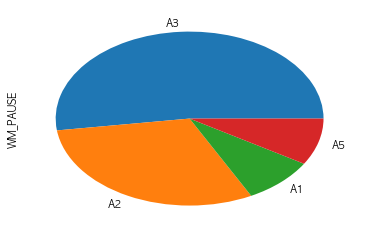

In [281]:
event_result_df.sort_values('WM_PAUSE', ascending=False)['WM_PAUSE'].plot(kind='pie')

In [282]:
event_result_df.columns

Index(['COMMON_WIFI_ON', 'WM_CONTINUE', 'WM_ERROR', 'WM_PAUSE', 'WM_STATE',
       'WM_WASH_BEGIN', 'WM_WASH_END'],
      dtype='object', name='event_type')

In [283]:
mask = washer_df['event_type'] == 'WM_PAUSE'
washer_df.loc[mask, 'device_id'].value_counts()

A3    12
A2     7
A5     2
A1     2
Name: device_id, dtype: int64

In [285]:
washer_df['APCourse'].value_counts()

1     190
0     131
3      45
13     31
8      25
9      18
5      15
16     14
6      11
2       9
10      7
12      4
Name: APCourse, dtype: int64

In [287]:
ap_course_dict = {
    0: '찌든때',
    1: '표준세탁',
    2: '란제리/울',
    3: '알뜰삶음',
    5: '기능성의류',
    6: '찬물세탁',
    8: '알러지케어',
    9: '스팀클리닝',
    10: '이불',
    12: '헹굼/탈수',
    13: '스피드워시',
    16: '컬러케어',
}

In [300]:
# def fn(ap_course):
# #     return ap_course_dict[ap_course]
#     return ap_course_dict.get(ap_course)

# washer_df['APCourse_label'] = washer_df['APCourse'].apply(fn)
washer_df['APCourse_label'] = washer_df['APCourse'].apply(ap_course_dict.get)
washer_df[['APCourse', 'APCourse_label']].head()

,APCourse,APCourse_label
0,1,표준세탁
1,0,찌든때
2,0,찌든때
3,1,표준세탁
4,0,찌든때


In [301]:
washer_df['APCourse_label'].value_counts()

표준세탁     190
찌든때      131
알뜰삶음      45
스피드워시     31
알러지케어     25
스팀클리닝     18
기능성의류     15
컬러케어      14
찬물세탁      11
란제리/울      9
이불         7
헹굼/탈수      4
Name: APCourse_label, dtype: int64

In [294]:
d = {'b': 1}

In [298]:
# try:
#     value = d['a']
# except KeyError:
#     value = 0

value = d.get('a', 0)

value

0

<div class="alert alert-info">
device_id 별 APCourse_label 현황을 DataFrame으로 표현해보세요.
</div>